In [3]:
%load_ext kedro.ipython


[11/30/24 09:39:56] INFO     Using                                                                  ]8;id=330840;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=982765;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/framework/project/__init__.py#249\249]8;;\
                             '/home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro                
                             /framework/project/rich_logging.yml' as logging configuration.                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=21932;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=998414;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=435421;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=836242;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=298026;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=810044;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py#175\175]8;;\
                             /home/mayank/sem7/MLprod/final_project/fantasy.                                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[11/30/24 09:39:57] INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=387909;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro_mlflow/framework/hooks/mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=960964;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro_mlflow/framework/hooks/mlflow_hook.py#62\62]8;;\

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=637505;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro_mlflow/config/kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=220710;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro_mlflow/config/kedro_mlflow_config.py#260\260]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///home/mayank/sem7/MLprod/final_project/fantasy/mlru                           
                             ns'                                                                                   

[11/30/24 09:39:59] WARNING  /home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ ]8;id=741090;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=503707;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/warnings.py#109\109]8;;\
                             framework/project/__init__.py:429: UserWarning: An error occurred                     
                             while importing the 'fantasy.pipelines.inference' module. Nothing                     
                             defined therein will be returned by 'find_pipelines'.                                 
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "/home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro                
                             /framework/project/__init__.py", line 421, in find_pipelines                          
                                 pipeline_module = importlib.import_module(pipeline_module_name)                   
                               File                                                                                
                             "/home/mayank/anaconda3/envs/ai_839/lib/python3.10/importlib/__init__.                
                             py", line 126, in import_module                                                       
                                 return _bootstrap._gcd_import(name[level:], package, level)                       
                               File "<frozen importlib._bootstrap>", line 1050, in _gcd_import                     
                               File "<frozen importlib._bootstrap>", line 1027, in _find_and_load                  
                               File "<frozen importlib._bootstrap>", line 1006, in                                 
                             _find_and_load_unlocked                                                               
                               File "<frozen importlib._bootstrap>", line 688, in _load_unlocked                   
                               File "<frozen importlib._bootstrap_external>", line 883, in                         
                             exec_module                                                                           
                               File "<frozen importlib._bootstrap>", line 241, in                                  
                             _call_with_frames_removed                                                             
                               File                                                                                
                             "/home/mayank/sem7/MLprod/final_project/fantasy/src/fantasy/pipelines/                
                             inference/__init__.py", line 6, in <module>                                           
                                 from .pipeline import create_pipeline                                             
                               File                                                                                
                             "/home/mayank/sem7/MLprod/final_project/fantasy/src/fantasy/pipelines/                
                             inference/pipeline.py", line 7, in <module>                                           
                                 from .nodes import *                                                              
                               File                                                                                
                             "/home/mayank/sem7/MLprod/final_project/fantasy/src/fantasy/pipelines/   

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=182225;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=785890;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:00] INFO     Kedro project fantasy                                                  ]8;id=658827;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=690368;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=23884;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=972452;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[11/30/24 09:40:01] INFO     Registered line magic 'run_viz'                                        ]8;id=439532;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=731565;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py#148\148]8;;\

In [4]:
!pip install -q torchcp
!pip install -q captum


# IMPORTS

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.autograd import Variable
import torchcp

# CONTEXT LOADING 

In [6]:
matches_df = context.catalog.load("matches")
deliveries_df = context.catalog.load("deliveries")
bat_df = context.catalog.load("batsman_scorecard")
bowl_df = context.catalog.load("bowler_scorecard")
field_df = context.catalog.load("fielder_scorecard")
X_test_bat = context.catalog.load("X_test_bat") 
y_test_bat = context.catalog.load("y_test_bat") 
lstm_model_bat = context.catalog.load("lstm_model_bat")
X_test_bowl = context.catalog.load("X_test_bowl") 
lstm_model_bowl = context.catalog.load("lstm_model_bowl")
X_test_field = context.catalog.load("X_test_field") 
lstm_model_field = context.catalog.load("lstm_model_field")
X_cali_bat = context.catalog.load("X_cali_bat")
y_cali_bat = context.catalog.load("y_cali_bat")
split_predictor_bat = context.catalog.load("split_predictor_bat")
split_predictor_bowl = context.catalog.load("split_predictor_bowl")
split_predictor_field = context.catalog.load("split_predictor_field")
inference_output = context.catalog.load("inference_output")


[11/30/24 09:40:04] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=69906;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=753666;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:05] INFO     Loading data from matches (CSVDataset)...                          ]8;id=391352;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=354298;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=552413;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=299622;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:06] INFO     Loading data from deliveries (CSVDataset)...                       ]8;id=75601;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=141685;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

[11/30/24 09:40:07] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=986467;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=732217;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:08] INFO     Loading data from batsman_scorecard (CSVDataset)...                ]8;id=974276;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=246771;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=666224;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=166840;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:09] INFO     Loading data from bowler_scorecard (CSVDataset)...                 ]8;id=399153;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=895346;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=180327;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=844178;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:10] INFO     Loading data from fielder_scorecard (CSVDataset)...                ]8;id=258623;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=305617;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=209352;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=159628;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:11] INFO     Loading data from X_test_bat (CSVDataset)...                       ]8;id=744793;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=36500;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

[11/30/24 09:40:12] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=43023;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=749409;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:13] INFO     Loading data from y_test_bat (CSVDataset)...                       ]8;id=603374;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=688125;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=90119;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=211590;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:14] INFO     Loading data from lstm_model_bat (MlflowPickleDataset)...          ]8;id=579828;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=426507;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=85055;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=614813;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:15] INFO     Loading data from X_test_bowl (CSVDataset)...                      ]8;id=686430;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=519514;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=272811;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=176709;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:16] INFO     Loading data from lstm_model_bowl (MlflowPickleDataset)...         ]8;id=227146;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=920209;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=884078;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=587103;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:18] INFO     Loading data from X_test_field (CSVDataset)...                     ]8;id=561368;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=633129;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=649195;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=711174;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:19] INFO     Loading data from lstm_model_field (MlflowPickleDataset)...        ]8;id=686908;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=604503;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=658425;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=395960;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:20] INFO     Loading data from X_cali_bat (CSVDataset)...                       ]8;id=880028;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=976989;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=651170;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=696251;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:21] INFO     Loading data from y_cali_bat (CSVDataset)...                       ]8;id=521787;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=866220;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=805874;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=414960;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:23] INFO     Loading data from split_predictor_bat (MlflowPickleDataset)...     ]8;id=75425;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=864289;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=93380;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=119353;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:24] INFO     Loading data from split_predictor_bowl (MlflowPickleDataset)...    ]8;id=809468;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=891417;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=290719;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=481414;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:25] INFO     Loading data from split_predictor_field (MlflowPickleDataset)...   ]8;id=831587;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=331173;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=903375;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=185914;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 09:40:26] INFO     Loading data from inference_output (CSVDataset)...                 ]8;id=564668;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=609279;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

In [7]:
matches_df = matches_df.sort_values(by='date', ascending=False)


In [8]:
def get_match_players(match_id):
    match_players = list(set(bat_df[bat_df['match_id'] == match_id]['batter'].unique()).union(
        set(bowl_df[bowl_df['match_id'] == match_id]['bowler'].unique()).union(
            set(field_df[field_df['match_id'] == match_id]['fielder'].unique())
        )
    ))
    return match_players

match_players = get_match_players(1426312)

# INTEGRATED GRADIENTS

## bat

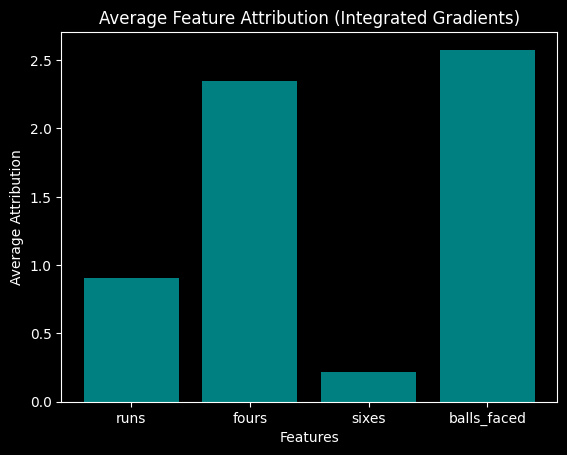

In [26]:
import torch
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt

# Feature names
feature_names_bat = ['runs', 'fours', 'sixes', 'balls_faced']

# Initialize the Integrated Gradients explainer
ig = IntegratedGradients(lstm_model_bat)

# Reshape input to include batch dimension (1, 5, 4)
X_test_reshaped = X_test_bat.values.reshape(-1, 5, 4)
input_tensor = torch.FloatTensor(X_test_reshaped[0]).unsqueeze(0)  # Shape: [1, 5, 4]
baseline_tensor = torch.zeros_like(input_tensor)  # Same shape as input_tensor with batch dimension

# Compute Integrated Gradients
attributions, delta = ig.attribute(input_tensor, baseline_tensor, target=0, return_convergence_delta=True)

# Remove batch dimension and convert to numpy (Shape: [5, 4])
attributions_np = attributions.squeeze(0).detach().numpy()

# Calculate average attribution across time steps for each feature (axis 0 is time step)
avg_attributions = attributions_np.mean(axis=0)

# Plot the bar graph of average attributions per feature
plt.bar(feature_names_bat, avg_attributions, color='teal')
plt.xlabel('Features')
plt.ylabel('Average Attribution')
plt.title('Average Feature Attribution (Integrated Gradients)')
plt.show()


## bowl

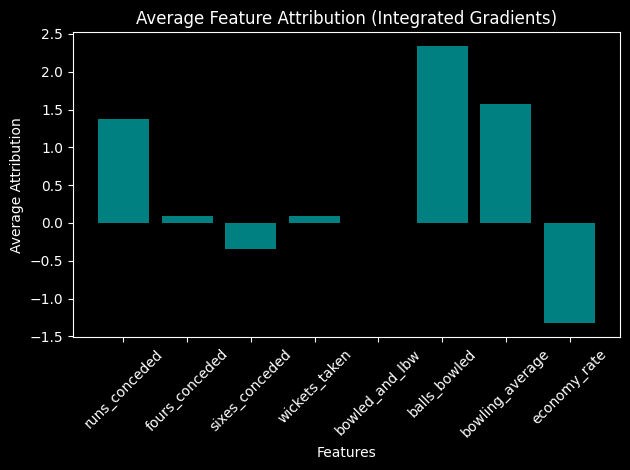

In [28]:
import torch
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt

# Feature names
feature_names = [
    'runs_conceded', 'fours_conceded', 'sixes_conceded', 
    'wickets_taken', 'bowled_and_lbw', 'balls_bowled', 
    'bowling_average', 'economy_rate'
]

# Initialize the Integrated Gradients explainer
ig = IntegratedGradients(lstm_model_bowl)

# Reshape input to include batch dimension (1, 5, 8)
X_test_reshaped = X_test_bowl.values.reshape(-1, 5, 8)
input_tensor = torch.FloatTensor(X_test_reshaped[0]).unsqueeze(0)  # Shape: [1, 5, 8]
baseline_tensor = torch.zeros_like(input_tensor)  # Same shape as input_tensor with batch dimension

# Compute Integrated Gradients
attributions, delta = ig.attribute(input_tensor, baseline_tensor, target=0, return_convergence_delta=True)

# Remove batch dimension and convert to numpy (Shape: [5, 8])
attributions_np = attributions.squeeze(0).detach().numpy()

# Calculate average attribution across time steps for each feature (axis 0 is time step)
avg_attributions = attributions_np.mean(axis=0)

# Plot the bar graph of average attributions per feature
plt.bar(feature_names, avg_attributions, color='teal')
plt.xlabel('Features')
plt.ylabel('Average Attribution')
plt.title('Average Feature Attribution (Integrated Gradients)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()       # Adjust layout to prevent label overlap
plt.show()


## field

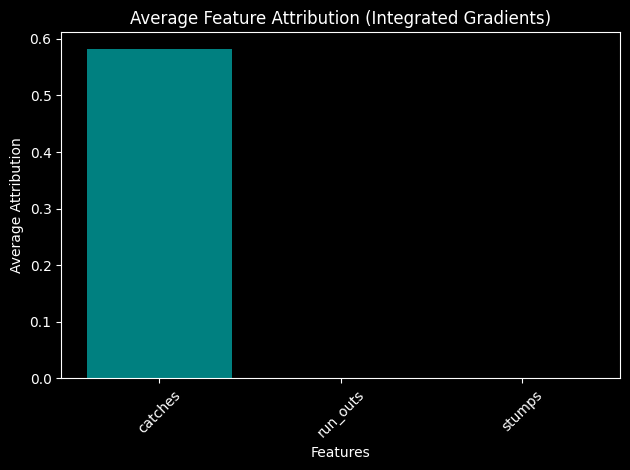

In [29]:
import torch
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt

# Feature names
feature_names = ['catches', 'run_outs', 'stumps']

# Initialize the Integrated Gradients explainer
ig = IntegratedGradients(lstm_model_field)

# Reshape input to include batch dimension (1, 5, 3)
X_test_reshaped = X_test_field.values.reshape(-1, 5, 3)
input_tensor = torch.FloatTensor(X_test_reshaped[0]).unsqueeze(0)  # Shape: [1, 5, 3]
baseline_tensor = torch.zeros_like(input_tensor)  # Same shape as input_tensor with batch dimension

# Compute Integrated Gradients
attributions, delta = ig.attribute(input_tensor, baseline_tensor, target=0, return_convergence_delta=True)

# Remove batch dimension and convert to numpy (Shape: [5, 3])
attributions_np = attributions.squeeze(0).detach().numpy()

# Calculate average attribution across time steps for each feature (axis 0 is time step)
avg_attributions = attributions_np.mean(axis=0)

# Plot the bar graph of average attributions per feature
plt.bar(feature_names, avg_attributions, color='teal')
plt.xlabel('Features')
plt.ylabel('Average Attribution')
plt.title('Average Feature Attribution (Integrated Gradients)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()       # Adjust layout to prevent label overlap
plt.show()


# Inference output

In [30]:
inference_output = context.catalog.load("inference_output")
inference_output

[11/30/24 10:09:29] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=838394;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=603463;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/30/24 10:09:30] INFO     Loading data from inference_output (CSVDataset)...                 ]8;id=335291;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=898442;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

,player,role,batting_points,bowling_points,fielding_points,total_points,cost,bat_lower_bound,bat_upper_bound,bowl_lower_bound,bowl_upper_bound,field_lower_bound,field_upper_bound
0,Rahmanullah Gurbaz,allrounder,31.476032,21.130692,11.923754,64.530478,4,-13.843369,76.795433,-16.764183,59.025566,2.780657,21.066851
1,SP Narine,batsman,38.073544,8.066486,12.206563,58.346593,5,-7.245857,83.392944,-29.828388,45.961361,3.063466,21.349659
2,T Natarajan,bowler,4.056541,30.616615,12.268169,46.941326,3,-41.262859,49.375942,-7.278259,68.511490,3.125072,21.411266
3,JD Unadkat,bowler,9.133430,30.946026,12.206563,52.286019,4,-36.185970,54.452831,-6.948849,68.840897,3.063466,21.349659
4,AK Markram,bowler,0.839941,29.570778,12.206563,42.617282,4,-44.479462,46.159340,-8.324097,67.465652,3.063466,21.349659
5,VR Iyer,allrounder,28.206942,21.729481,12.355688,62.292110,5,-17.112459,73.526344,-16.165394,59.624355,3.212591,21.498785
6,Shahbaz Ahmed,batsman,34.307159,9.273854,12.206563,55.787577,7,-11.012241,79.626556,-28.621021,47.168728,3.063466,21.349659
7,B Kumar,batsman,30.122150,-1.673260,16.389153,44.838043,6,-15.197250,75.441551,-39.568134,36.221615,7.246056,25.532249
8,SS Iyer,allrounder,39.349186,29.536572,12.435587,81.321344,7,-5.970215,84.668587,-8.358303,67.431442,3.292490,21.578684
9,MA Starc,allrounder,36.596107,11.730933,15.231909,63.558949,8,-8.723293,81.915512,-26.163940,49.625809,6.088812,24.375006


In [15]:
bat_df.head()

,match_id,batter,runs,fours,sixes,balls_faced,player_team,opponent_team,strike_rate,batting_points,date,venue
0,548346,A Ashish Reddy,10,0,1,10,Deccan Chargers,Mumbai Indians,100.0,12,2012-04-29,Wankhede Stadium
1,548352,A Ashish Reddy,3,0,0,3,Deccan Chargers,Chennai Super Kings,100.0,3,2012-05-04,"MA Chidambaram Stadium, Chepauk"
2,548359,A Ashish Reddy,8,1,0,8,Deccan Chargers,Kings XI Punjab,100.0,9,2012-05-08,"Rajiv Gandhi International Stadium, Uppal"
3,548373,A Ashish Reddy,10,2,0,4,Deccan Chargers,Rajasthan Royals,250.0,12,2012-05-18,"Rajiv Gandhi International Stadium, Uppal"
4,548376,A Ashish Reddy,4,0,0,5,Deccan Chargers,Royal Challengers Bangalore,80.0,4,2012-05-20,"Rajiv Gandhi International Stadium, Uppal"
